# Import and explore the data


  visit_date                                name  n_workers mineral  \
0 2013-03-27                           Mayi-Tatu      150.0    Gold   
1 2013-03-27                             Mabanga      115.0    Gold   
2 2013-03-27                             Molende      130.0    Gold   
3 2013-03-27                          Embouchure      135.0    Gold   
4 2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4       POINT (29.66 0.956)  
EPSG:4326


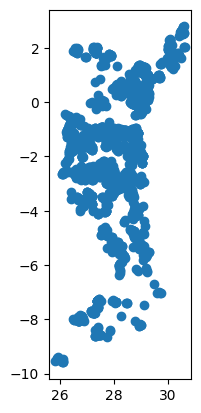

In [1]:
# Import GeoPandas and Matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = gpd.read_file("../../data/raw/ipis_cod_mines.geojson")

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot()
plt.show()

     SCE_SEM    SCE_GEO      DATE_             ORIGINE  \
0    WWF/RDC    WWF/RDC 2007-04-18  GPS / Numérisation   
1  WWF/EARPO  WWF/EARPO 2007-04-18  GPS / Numérisation   
2     SYGIAP     SYGIAP 2007-04-18  GPS / Numérisation   
3     SYGIAP     SYGIAP 2007-04-18  GPS / Numérisation   
4     SYGIAP     SYGIAP 2007-04-18  GPS / Numérisation   

                               NOM             REGLEMENT VALID        Statut  \
0  Réserve de biosphère de la Luki  Réserve de biosphère   oui          Créé   
1      Réserve naturelle d'Itombwe     Réserve naturelle   oui          Créé   
2        Réserve de faune à Okapis     Réserve naturelle   oui  Opérationnel   
3      Parc National de la Salonga         Parc National   oui  Opérationnel   
4      Parc National de la Salonga         Parc National   oui  Opérationnel   

      Shape_Leng  Categorie  ...        TYPE2_AP                 NAME_AP  \
0  133507.042122          0  ...  Nature Reserve  Luki Biosphere Reserve   
1  726569.150601  

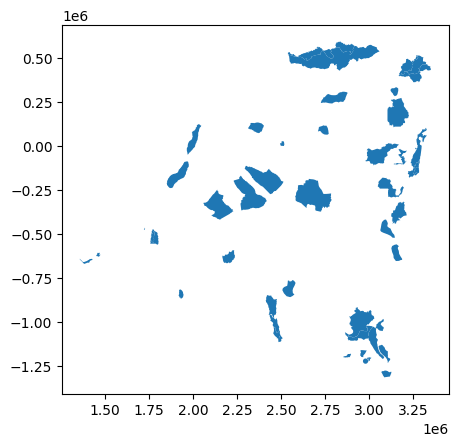

In [2]:
# Read the mining site data
national_parks = gpd.read_file("../../data/raw/cod_conservation")

# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

# Make a quick visualisation
national_parks.plot()
plt.show()


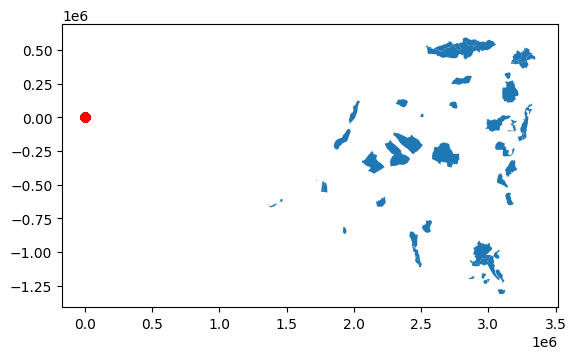

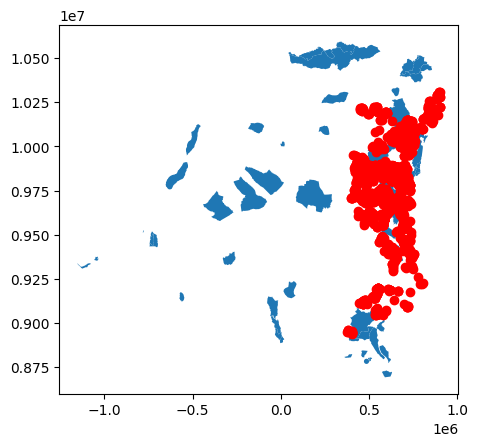

In [3]:
# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs("EPSG:32735")
national_parks_utm = national_parks.to_crs("EPSG:32735")

# Plot the converted data again
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

In [2]:
# Read the mining site data
mining_sites = gpd.read_file("../../data/raw/ipis_cod_mines.geojson")
national_parks = gpd.read_file("../../data/raw/cod_conservation")

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

# Write converted data to a file
mining_sites_utm.to_file("../../data/processed/ipis_cod_mines_utm.gpkg",driver='GPKG')
national_parks_utm.to_file("../../data/processed/cod_conservation_utm.shp",driver='ESRI Shapefile')

/Users/master_slave/python_project/basic-geo-spatial-analysis/.venv/lib/python3.11/site-packages/pyogrio/raw.py:733: RuntimeWarning: Field DATE_ created as String field, though DateTime requested.
  ogr_write(
/Users/master_slave/python_project/basic-geo-spatial-analysis/.venv/lib/python3.11/site-packages/pyogrio/raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Réf_Juridi' to 'Réf_Jurid'
  ogr_write(


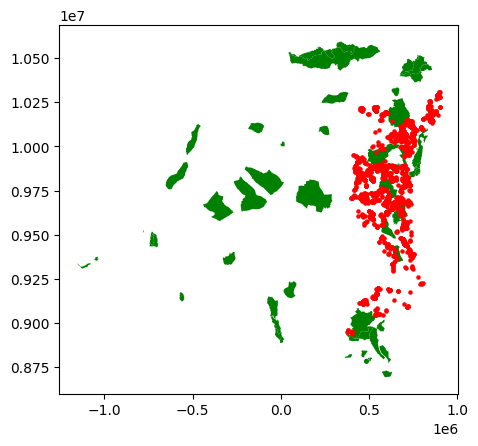

In [3]:
# Plot of the parks and mining sites
national_parks = gpd.read_file('../../data/processed/cod_conservation_utm.shp')
mining_sites = gpd.read_file('../../data/processed/ipis_cod_mines_utm.gpkg')
ax = national_parks.plot(color="green")
mining_sites.plot(ax=ax, markersize=5, color="red")
plt.show()

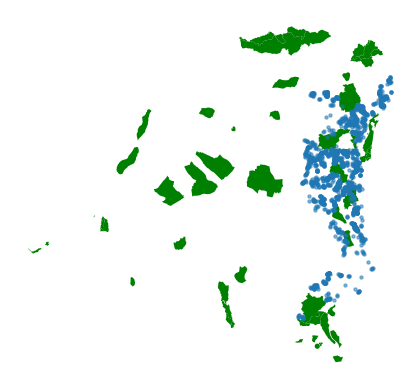

In [6]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()
plt.show()

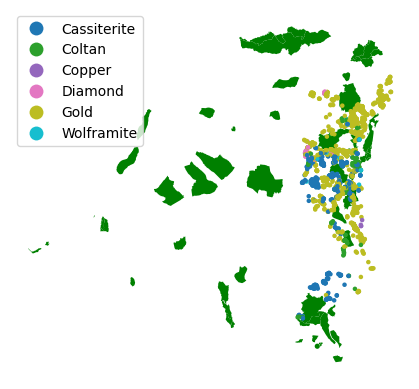

In [7]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5, column='mineral', legend=True)
ax.set_axis_off()
plt.show()

## การดึงข้อมูลจากชั้นข้อมูลราสเตอร์ (Raster Layer)

ในขั้นตอนนี้ เราจะดึงข้อมูลจากชั้นข้อมูลแบบราสเตอร์ โดยอ้างอิงจากไฟล์ข้อมูลแบบเวกเตอร์ ซึ่งความสามารถนี้สามารถทำได้ด้วยแพ็กเกจ `rasterstats`

สำหรับแบบฝึกหัดนี้ เราจะระบุประเภทพืชพรรณ (vegetation type) ของทุกจุดเหมืองแร่ โดยดึงค่าพิกเซลที่อยู่ใกล้ที่สุดในราสเตอร์สำหรับแต่ละตำแหน่งจุดของชุดข้อมูลเหมืองแร่

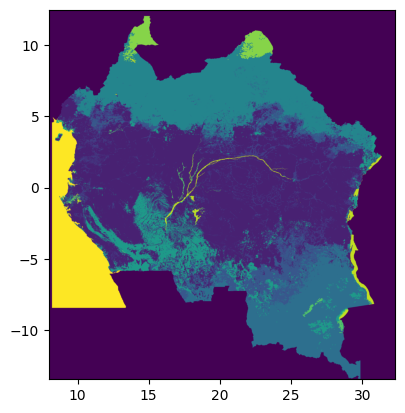

In [4]:
# Import the rasterio package
import rasterio
import rasterio.plot

# Open the raster dataset
src = rasterio.open("../../data/raw/trees_central-africa.tif")

# Import the plotting functionality of rasterio

# Plot the raster layer with the mining sites
ax = rasterio.plot.show(src)
mining_sites.plot(color="red", markersize=1,ax=ax)
plt.show()

Raster CRS: GEOGCS["Clarke 1866",DATUM["Clarke 1866",SPHEROID["Clarke 1866",6378206.4,294.978698213898]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Raster bounds: BoundingBox(left=7.99500000011, bottom=-13.46199942921, right=32.29499946551, top=12.48799999989)
Points bounds: [25.85       -9.59008333 30.623077    2.785816  ]
Sample codes head: [1. 1. 1. 1. 1. 2. 2. 2. 2. 6.]
Sample missing %: 0.0
Missing vegetation labels (%): 0.0
   vegetation_code  vegetation_code_int          vegetation
0              1.0                    1  Dense moist forest
1              1.0                    1  Dense moist forest
2              1.0                    1  Dense moist forest
3              1.0                    1  Dense moist forest
4              1.0                    1  Dense moist forest


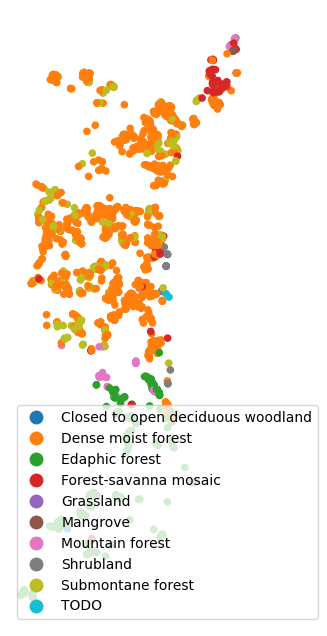

In [5]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

vegetation_raster = "../../data/raw/trees_central-africa.tif"

vegetation_types = {
    0: "TODO",
    1: "Dense moist forest",
    2: "Submontane forest",
    3: "Mountain forest",
    4: "Edaphic forest",
    5: "Mangrove",
    6: "Forest-savanna mosaic",
    7: "Rural complex and Young secondary forest",
    8: "Closed to open deciduous woodland",
    9: "Savanna woodland - Tree savanna",
    10: "Shrubland",
    11: "Grassland",
    12: "Aquatic grassland",
    13: "Swamp grassland",
    14: "Sparse vegetation",
    15: "Mosaic cultivated areas / vegetation (herbaceous or shrubs)",
    16: "Agriculture",
    17: "Irrigated agriculture",
    18: "Bare areas",
    19: "Artificial Surfaces and Associated Areas",
    20: "Water Bodies",
}

# -------------------------
# 0) Sanity checks
# -------------------------
if mining_sites.crs is None:
    raise ValueError("mining_sites.crs is None. Please set CRS before running.")

# -------------------------
# 1) Read raster once + get CRS
# -------------------------
with rasterio.open(vegetation_raster) as src:
    raster_crs = src.crs
    raster_bounds = src.bounds

print("Raster CRS:", raster_crs)
print("Raster bounds:", raster_bounds)

# -------------------------
# 2) Reproject points to raster CRS
# -------------------------
mining_sites_r = mining_sites.to_crs(raster_crs)

# Optional: quick bounds check to avoid querying totally outside raster
pts_bounds = mining_sites_r.total_bounds  # minx, miny, maxx, maxy
print("Points bounds:", pts_bounds)

# -------------------------
# 3) QUICK TEST on small sample (helps avoid crashing the kernel)
# -------------------------
sample_n = min(200, len(mining_sites_r))
sample = mining_sites_r.iloc[:sample_n].copy()

# -------------------------
# 4) Query raster values using rasterio.sample (more stable than rasterstats)
# -------------------------
def sample_raster_codes(points_gdf, raster_path):
    """Return a float numpy array of raster values at point locations."""
    coords = [(geom.x, geom.y) for geom in points_gdf.geometry]
    with rasterio.open(raster_path) as src:
        vals = list(src.sample(coords))  # list of arrays (bands,)
    # assume single-band raster
    arr = np.array([v[0] if v is not None and len(v) else np.nan for v in vals], dtype="float")
    return arr

# Test first (small sample)
sample_codes = sample_raster_codes(sample, vegetation_raster)
print("Sample codes head:", sample_codes[:10])
print("Sample missing %:", np.isnan(sample_codes).mean() * 100)

# If sample looks fine, run full
codes = sample_raster_codes(mining_sites_r, vegetation_raster)

# -------------------------
# 5) Store codes + map to labels
# -------------------------
mining_sites["vegetation_code"] = codes

# Round to nearest int, keep missing as <NA>
mining_sites["vegetation_code_int"] = (
    np.floor(mining_sites["vegetation_code"] + 0.5).astype("Int64")
)

mining_sites["vegetation"] = mining_sites["vegetation_code_int"].map(vegetation_types)

print("Missing vegetation labels (%):", mining_sites["vegetation"].isna().mean() * 100)
print(mining_sites[["vegetation_code", "vegetation_code_int", "vegetation"]].head())

# -------------------------
# 6) Plot safely (drop NA to avoid GeoPandas legend crash)
# -------------------------
mining_sites_valid = mining_sites.dropna(subset=["vegetation"]).copy()

ax = mining_sites_valid.plot(
    column="vegetation",
    legend=True,
    figsize=(10, 8),
    markersize=20
)
ax.set_axis_off()
plt.show()